In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [7]:
df = pd.read_csv("/content/drive/MyDrive/DSW_Internship_Task/historic.csv")
df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [8]:
df.isnull().value_counts()  # Checking null values present in dataframe

item_no  category  main_promotion  color  stars  success_indicator
False    False     False           False  False  False                8000
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [ ]:
df.duplicated().value_counts() # checking duplicates present in dataframe

False    8000
dtype: int64

Dropping the item_no as it as a uniques value to represent each block it has no use in prediction task.

In [10]:
df = df[['category','main_promotion','color','stars','success_indicator']]
df.head()

,category,main_promotion,color,stars,success_indicator
0,Tunic,Catalog,Green,3.1,flop
1,Hoodie,Category_Highlight,Red,1.5,flop
2,Sweatshirt,Catalog,Red,4.4,top
3,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,Hoodie,Category_Highlight,Green,4.1,top


In [11]:
df['category'].value_counts()

Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

Encoding the category as its object type in string and to train the neural network we required the one dimensional data

In [12]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded 6 product category into num using label encoder
le1 = LabelEncoder()
encoded_category1 = le1.fit_transform(df['category'])
print(encoded_category1)

[5 1 3 ... 4 0 3]


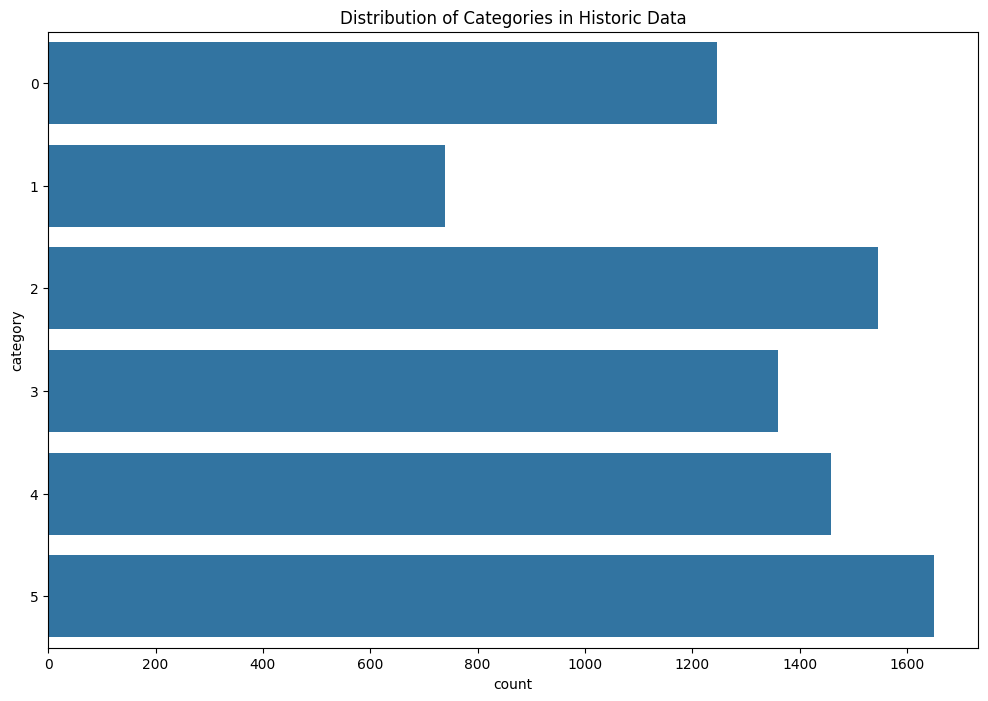

In [23]:
# Distribution of categories in historic data
plt.figure(figsize=(12, 8))
sea.countplot(y='category', data=df)
plt.title('Distribution of Categories in Historic Data')
plt.show()

In [13]:
df['category'] = encoded_category1

In [14]:
encoded_categories1 = le1.classes_
encoded_categories1

array(['Blouse', 'Hoodie', 'Polo-Shirt', 'Sweatshirt', 'T-Shirt', 'Tunic'],
      dtype=object)

In [15]:
encoded_values1 = le1.transform(encoded_categories1)
category_mapping1 = dict(zip(encoded_categories1, encoded_values1)) # dictionary mapping the names to the numerical values
for category1, value1 in category_mapping1.items():
    print(f"Encoded Category: {category1}, Encoded Value: {value1}")  # encoded value with its original name

Encoded Category: Blouse, Encoded Value: 0
Encoded Category: Hoodie, Encoded Value: 1
Encoded Category: Polo-Shirt, Encoded Value: 2
Encoded Category: Sweatshirt, Encoded Value: 3
Encoded Category: T-Shirt, Encoded Value: 4
Encoded Category: Tunic, Encoded Value: 5


In [16]:
pd.crosstab(df['category'], df['success_indicator'])

success_indicator,flop,top
category,,
0,363,883
1,258,481
2,817,729
3,453,907
4,271,1188
5,653,997


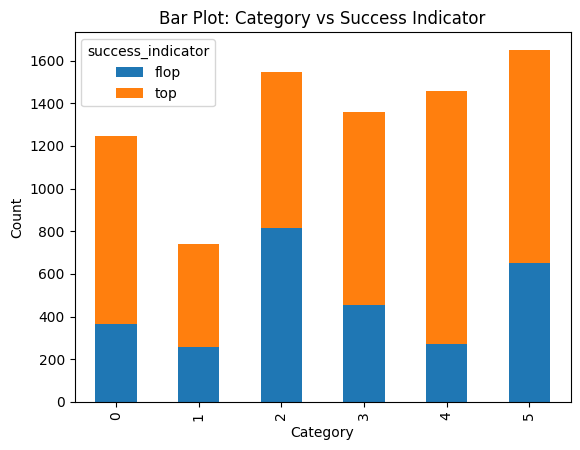

In [17]:
cross_tab = pd.crosstab(df['category'], df['success_indicator'])

cross_tab.plot.bar(stacked=True) # will plot the stacked bar plot

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot: Category vs Success Indicator')
plt.show()

In [ ]:
df['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded 6 product category into num using label encoder
le2 = LabelEncoder()
encoded_main_promotion = le2.fit_transform(df['main_promotion'])
print(encoded_main_promotion)

[0 1 0 ... 1 1 2]


In [ ]:
df['main_promotion'] = encoded_main_promotion

In [ ]:
encoded_categories_mp = le2.classes_
encoded_categories_mp

array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [ ]:
encoded_values2 = le2.transform(encoded_categories_mp)
category_mapping2 = dict(zip(encoded_categories_mp, encoded_values2)) # dictionary mapping the names to the numerical values
for mp, value2 in category_mapping2.items():
    print(f"Encoded Category: {mp}, Encoded Value: {value2}")  # encoded value with its original name

Encoded Category: Catalog, Encoded Value: 0
Encoded Category: Category_Highlight, Encoded Value: 1
Encoded Category: Display_Ad_Campaign, Encoded Value: 2
Encoded Category: Frontpage_Header, Encoded Value: 3


In [ ]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2

success_indicator,flop,top
main_promotion,,
0,953,1293
1,930,1502
2,335,974
3,597,1416


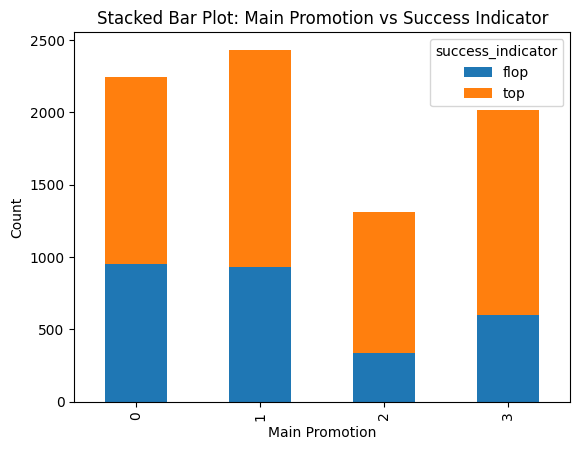

In [ ]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()

In [ ]:
df['color'].value_counts()

Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded color category into num using label encoder
le3 = LabelEncoder()
encoded_color = le3.fit_transform(df['color'])
print(encoded_color)

[3 7 7 ... 9 1 1]


In [ ]:
df['color'] = encoded_color

In [ ]:
encoded_color_class = le3.classes_
encoded_color_class

array(['Black', 'Blue', 'Brown', 'Green', 'Multi-Color', 'Orange', 'Pink',
       'Red', 'White', 'Yellow'], dtype=object)

In [ ]:
encoded_values3 = le3.transform(encoded_color_class)
category_mapping3 = dict(zip(encoded_color_class, encoded_values3)) # dictionary mapping the names to the numerical values
for color, value3 in category_mapping3.items():
    print(f"Encoded Category: {color}, Encoded Value: {value3}")  # encoded value with its original name

Encoded Category: Black, Encoded Value: 0
Encoded Category: Blue, Encoded Value: 1
Encoded Category: Brown, Encoded Value: 2
Encoded Category: Green, Encoded Value: 3
Encoded Category: Multi-Color, Encoded Value: 4
Encoded Category: Orange, Encoded Value: 5
Encoded Category: Pink, Encoded Value: 6
Encoded Category: Red, Encoded Value: 7
Encoded Category: White, Encoded Value: 8
Encoded Category: Yellow, Encoded Value: 9


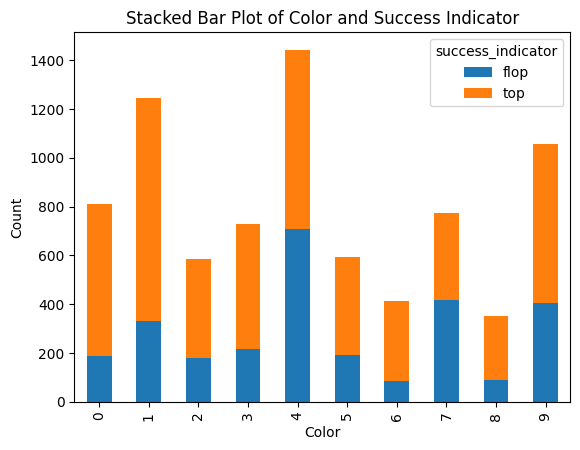

In [ ]:
ct = pd.crosstab(df['color'], df['success_indicator'])
ct.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

In [ ]:
df['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [ ]:
encoder = LabelEncoder()
df['success_indicator'] = encoder.fit_transform(df['success_indicator'])

In [ ]:
df['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

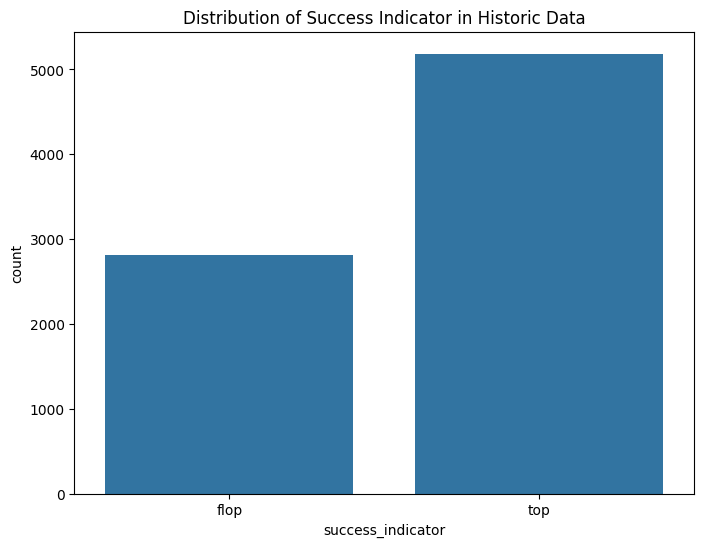

In [19]:
# Distribution of success_indicator
plt.figure(figsize=(8, 6))
sea.countplot(x='success_indicator', data=df)
plt.title('Distribution of Success Indicator in Historic Data')
plt.show()

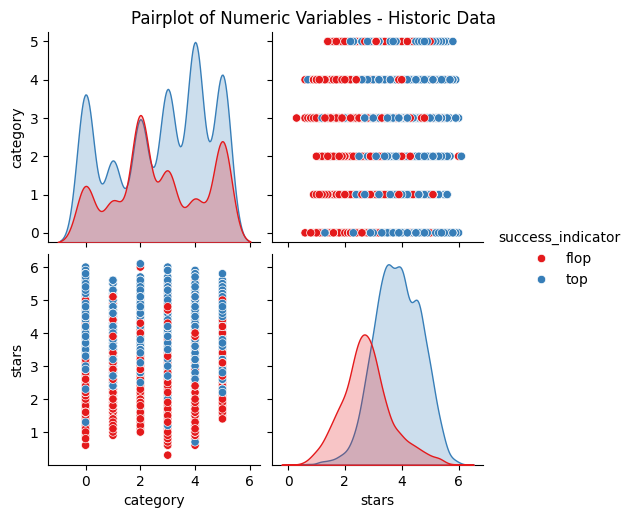

In [26]:
# Pairplot for numeric variables
sea.pairplot(df, hue='success_indicator', palette='Set1')
plt.suptitle('Pairplot of Numeric Variables - Historic Data', y=1.02)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 312.6 KB


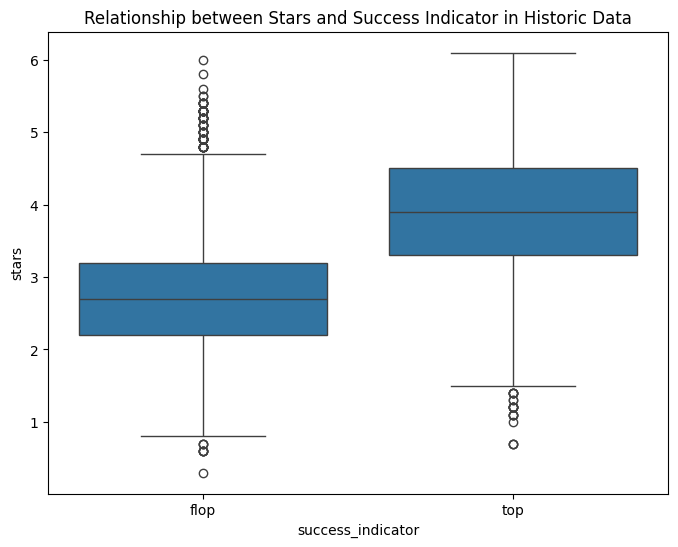

In [21]:
# Relationship between stars and success_indicator in historic data
plt.figure(figsize=(8, 6))
sea.boxplot(x='success_indicator', y='stars', data=df)
plt.title('Relationship between Stars and Success Indicator in Historic Data')
plt.show()

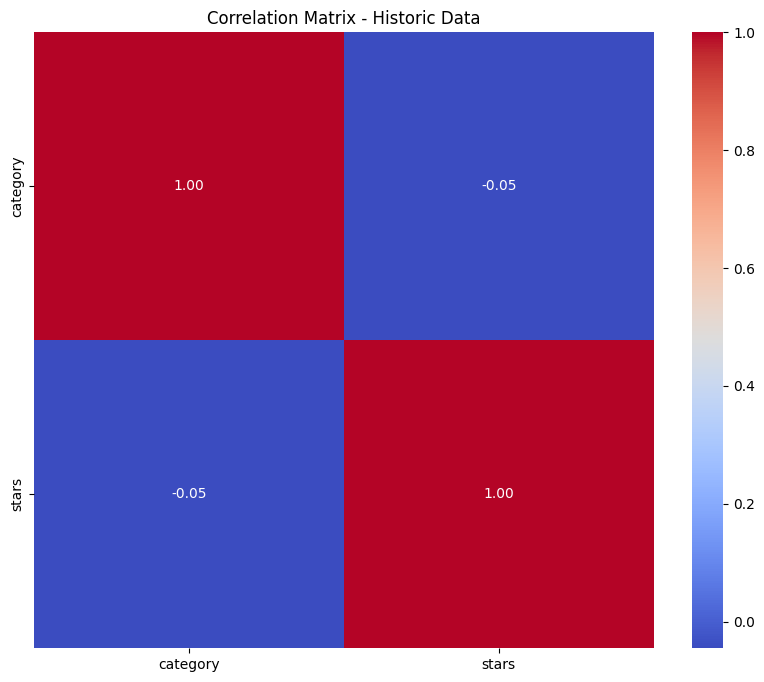

In [25]:
# Compute correlation matrix for historic data
historic_corr = df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sea.heatmap(historic_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Historic Data')
plt.show()

Balacing the imbalanced data present in the dataset

In [ ]:
from imblearn.over_sampling import SMOTE
x = df.drop('success_indicator', axis=1)
y = df['success_indicator']

In [ ]:
smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(x, y)
df_balanced = pd.concat([x_balanced, y_balanced], axis=1)
print(df_balanced)

       category  main_promotion  color     stars  success_indicator
0             5               0      3  3.100000                  0
1             1               1      7  1.500000                  0
2             3               0      7  4.400000                  1
3             2               1      1  3.100000                  0
4             1               1      3  4.100000                  1
...         ...             ...    ...       ...                ...
10365         4               3      4  2.144490                  0
10366         2               0      4  2.900000                  0
10367         5               1      9  3.057457                  0
10368         2               0      1  1.800000                  0
10369         4               0      4  1.700000                  0

[10370 rows x 5 columns]


In [ ]:
df_balanced.head()

,category,main_promotion,color,stars,success_indicator
0,5,0,3,3.1,flop
1,1,1,7,1.5,flop
2,3,0,7,4.4,top
3,2,1,1,3.1,flop
4,1,1,3,4.1,top


In [ ]:
df_balanced.shape

(10370, 5)

In [ ]:
df_balanced['success_indicator'].value_counts()

0    5185
1    5185
Name: success_indicator, dtype: int64

In [ ]:
df_balanced

,category,main_promotion,color,stars,success_indicator
0,5,0,3,3.100000,0
1,1,1,7,1.500000,0
2,3,0,7,4.400000,1
3,2,1,1,3.100000,0
4,1,1,3,4.100000,1
...,...,...,...,...,...
10365,4,3,4,2.144490,0
10366,2,0,4,2.900000,0
10367,5,1,9,3.057457,0
10368,2,0,1,1.800000,0


In [ ]:
df_balanced.to_csv('train_df.csv',index=False)